In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_generic_data(filename, x, y):
    D = np.zeros((x,y))
    with open(filename) as f:
        for line_num,line in enumerate(f):
            
            cols = line.strip().split(",")
            D[line_num,:] = map(float,cols)
    return standardize_data(D)

def standardize_data(D):
    [x,y] = D.shape
    for col in xrange(y):
        D[:,col] += abs(min(D[:,col]))

    for row in xrange(x):
        D[row,:] = D[row,:] * (100/np.mean(D[row,:])) # 100 is the mean, average firing rate per odor
        D[row,:] = map(int,D[row,:])
    
    return D

def generate_spike_trains(D, T, dt):
	M = T/dt
	spike_trains = np.zeros((len(D), len(D[0]), M))
	for i in range(M):
		X = np.random.uniform(size=M)
		for j in range(len(D)):
			for k in range(len(D[0])):
				if D[j,k] * dt/1000.0 > X[i]:
					spike_trains[j,k,i] = 1
				else:
					spike_trains[j,k,i] = 0
	return spike_trains

(784, 100)


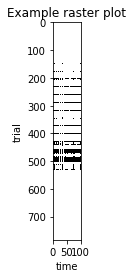

In [5]:
# Load in MNIST data
FEATURES = 784
NUM_EXAMPLES = 10000
D = read_generic_data('mnist10k.txt', NUM_EXAMPLES, FEATURES)

D = D[:100,:]
# Generate Spike Trains
T = 100
dt = 1
spike_trains = generate_spike_trains(D, T, dt)

lineoffsets2 = 1
linelengths2 = 1
# Raster plots
nbins = T/dt
ntrials = 784
spikes = spike_trains[0,:,:]
print spikes.shape
fig = plt.figure()
plt.imshow(spikes, cmap='Greys',  interpolation='nearest')
   
plt.title('Example raster plot')
plt.xlabel('time')
plt.ylabel('trial')
plt.show()